In [6]:
### Tabita Gabriela E. S | D082221007 ###

# Mengimport Library

In [7]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Mengimport file dataset

In [8]:
data = pd.read_csv('G:/Other computers/My Laptop/Semester 2/Big Data Analysis/Case Study 1/trip.csv')

In [9]:
print(len(data))
data.head()

236065


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
2,433,10/13/2014 10:33,10/13/2014 10:48,SEA00486,883.831,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1988.0
3,434,10/13/2014 10:34,10/13/2014 10:48,SEA00333,865.937,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Female,1977.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0


# Memfilter data khusus "Male"

In [10]:
male_data = data[(data['gender'] == 'Male')]

In [11]:
print(len(male_data))
male_data.head()

112940


,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0
5,436,10/13/2014 10:34,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974.0
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0


# Mencari mean, median, dan mode dari trip duration "Male"

In [12]:
trip_duration = list(male_data['tripduration'])
print('Mean of trip duration is %f'%statistics.mean(trip_duration))
print('Median of trip duration is %f'%statistics.median(trip_duration))
print('Mode of trip duration is %f'%statistics.mode(trip_duration))

Mean of trip duration is 563.402797
Median of trip duration is 458.451500
Mode of trip duration is 466.174000


# Plot frekuensi distribusi dari trip duration for trips untuk "Male"

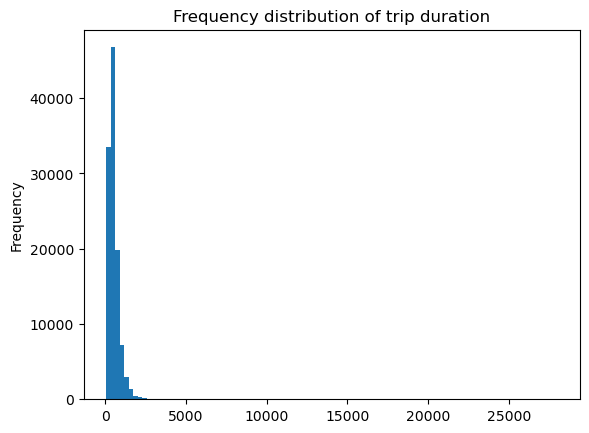

In [13]:
male_data['tripduration'].plot.hist(bins=100, title='Frequency distribution of trip duration')
plt.show()

# Plot boxplot dari trip duration of trips "Male"

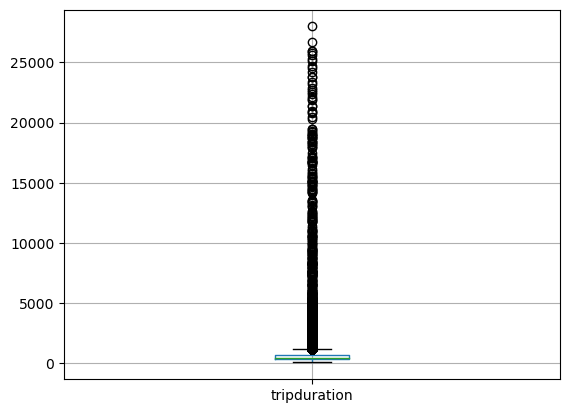

In [14]:
box = male_data.boxplot(column=['tripduration'])

# Menghitung persentase outliers

In [15]:
length = len(male_data)
q75, q25 = np.percentile(trip_duration, [75 ,25])
iqr = q75 - q25
print('Proportion of values as outlier: %f percent'%(length - len([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])*100/float(length)))

Proportion of values as outlier: 112845.030104 percent


# Mengganti outliers dengan mean

In [16]:
trip_duration = list(male_data['tripduration'])
mean_trip_duration = np.mean([x for x in trip_duration if q75+(1.5*iqr) >=x>= q25-(1.5*iqr)])
upper_whisker = q75+(1.5*iqr)
print('Mean of trip duration is %f'%mean_trip_duration)

Mean of trip duration is 482.552272


C:\Users\ASUS\AppData\Local\Temp\ipykernel_18184\2841867846.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  male_data.loc[:,'tripduration_mean'] = male_data.loc[:,'tripduration'].apply(lambda x: transform_tripduration(x))


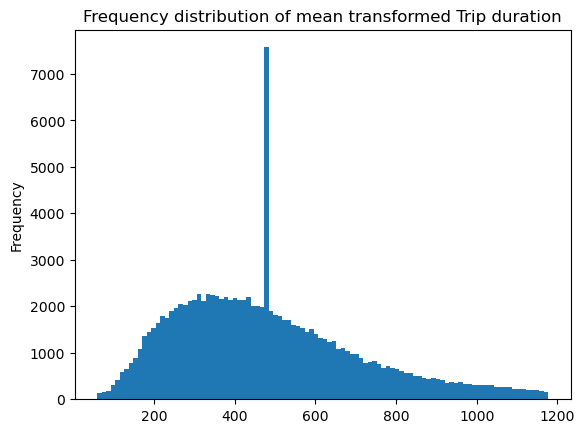

In [17]:
def transform_tripduration(x):
    if x > upper_whisker:
        return mean_trip_duration
    return x

male_data.loc[:,'tripduration_mean'] = male_data.loc[:,'tripduration'].apply(lambda x: transform_tripduration(x))
male_data['tripduration_mean'].plot.hist(bins=100, title='Frequency distribution of mean transformed Trip duration')
plt.show()

In [18]:
male_data

,trip_id,starttime,stoptime,bikeid,tripduration,from_station_name,to_station_name,from_station_id,to_station_id,usertype,gender,birthyear,tripduration_mean
0,431,10/13/2014 10:31,10/13/2014 10:48,SEA00298,985.935,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1960.0,985.935
1,432,10/13/2014 10:32,10/13/2014 10:48,SEA00195,926.375,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1970.0,926.375
4,435,10/13/2014 10:34,10/13/2014 10:49,SEA00202,923.923,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1971.0,923.923
5,436,10/13/2014 10:34,10/13/2014 10:47,SEA00337,808.805,2nd Ave & Spring St,Occidental Park / Occidental Ave S & S Washing...,CBD-06,PS-04,Member,Male,1974.0,808.805
6,437,10/13/2014 11:35,10/13/2014 11:45,SEA00202,596.715,Occidental Park / Occidental Ave S & S Washing...,King Street Station Plaza / 2nd Ave Extension ...,PS-04,PS-05,Member,Male,1978.0,596.715
...,...,...,...,...,...,...,...,...,...,...,...,...,...
236049,255230,8/31/2016 21:27,8/31/2016 21:30,SEA00056,198.324,Republican St & Westlake Ave N,Dexter Ave N & Aloha St,SLU-04,SLU-02,Member,Male,1981.0,198.324
236051,255232,8/31/2016 21:59,8/31/2016 22:04,SEA00499,308.484,E Harrison St & Broadway Ave E,Bellevue Ave & E Pine St,CH-02,CH-12,Member,Male,1989.0,308.484
236053,255234,8/31/2016 22:02,8/31/2016 22:17,SEA00448,879.160,Key Arena / 1st Ave N & Harrison St,Pier 66 / Alaskan Way & Bell St,SLU-19,WF-03,Member,Male,1981.0,879.160
236055,255236,8/31/2016 22:13,8/31/2016 22:25,SEA00254,674.993,3rd Ave & Broad St,Occidental Park / Occidental Ave S & S Washing...,BT-01,PS-04,Member,Male,1984.0,674.993


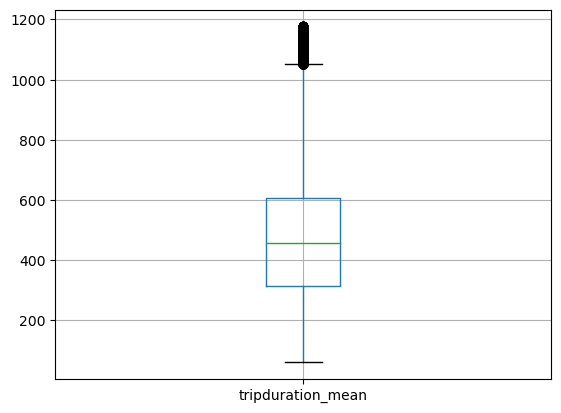

In [19]:
box2 = male_data.boxplot(column=['tripduration_mean'])

In [20]:
trip_duration_mean = list(male_data['tripduration_mean'])
length = len(male_data)
q75_mean, q25_mean = np.percentile(trip_duration_mean, [75 ,25])
iqr_mean = q75_mean - q75_mean
print('New proportion of values as outlier: %f percent'%(length - len([x for x in trip_duration_mean if q75_mean+(1.5*iqr_mean) >=x>= q25_mean-(1.5*iqr_mean)])*100/float(length)))

New proportion of values as outlier: 112890.000000 percent
